# El siguiente código compara la velocidad y efectividad al crear un clasificar por un método Iterativo (Perceptrón) VS un método númerico #

### Vamos primero a crear los datos de prueba ###

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def generate_random_line():
    # Genera una línea aleatoria (y = mx + b)
    m = np.random.uniform(-1, 1)
    b = np.random.uniform(-1, 1)
    return m, b

def generate_points(n, m, b):
    # Genera n puntos aleatorios a cada lado de la línea
    X = np.random.uniform(-1, 1, (n * 2, 2))
    y = np.sign(X[:, 1] - (m * X[:, 0] + b))
    # Aseguramos tener n puntos en cada conjunto
    while np.sum(y == 1) != n or np.sum(y == -1) != n:
        X = np.random.uniform(-1, 1, (n * 2, 2))
        y = np.sign(X[:, 1] - (m * X[:, 0] + b))
    return X, y



### En las siguientes lineas de código ahora vamos a crear ambos métodos el método clásico de neurona (visto en la presentación) y el método númerico (una regresión logistica)

In [17]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression(X, y, eta=0.1, epochs=1000):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  
    theta = np.zeros(X_b.shape[1])

    for epoch in range(epochs):
        gradients = X_b.T @ (sigmoid(X_b @ theta) - (y + 1) / 2) / X_b.shape[0]
        theta -= eta * gradients

    return theta

def perceptron(X, y, eta=0.1, epochs=1000):
    w = np.zeros(X.shape[1])
    b = 0
    for _ in range(epochs):
        for xi, target in zip(X, y):
            update = eta * (target - np.sign(np.dot(xi, w) + b))
            w += update * xi
            b += update
    return w, b

### Muestra de cómo se verán los resultados de cada método

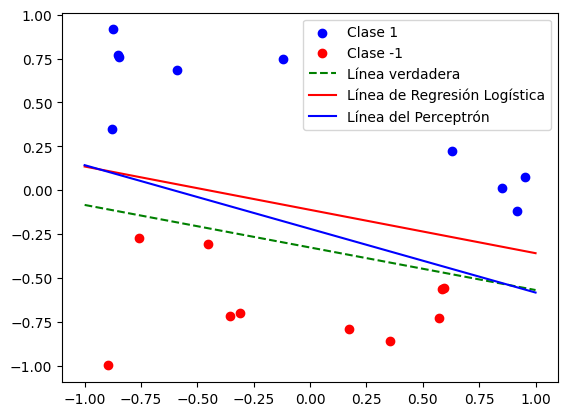

In [88]:
# Solicita el número de puntos
n = 10

# Genera una línea aleatoria
true_m, true_b = generate_random_line()

# Genera puntos alrededor de la línea
X, y = generate_points(n, true_m, true_b)

# Aplica la regresión logística
theta_logistic = logistic_regression(X, y)

# Aplica el método del Perceptrón
w_perceptron, b_perceptron = perceptron(X, y)

# Plotea los puntos y las líneas
plot_points_and_lines(X, y, true_m, true_b, theta_logistic, w_perceptron, b_perceptron)


### Por último vamos a solicitar el número datos de prueba para comparar ambos modelos y ploteamos sus resultados ###

### Estadística de tiempos del método clásico del perceptrón ###

In [72]:
import time 

#Ciclar y cronometrar para los datos usando el método iterativo 

n = 11

array_n = np.zeros(n)
tiempos_perceptron = np.zeros(n)
tiempos_regresion = np.zeros(n)

for i in range(1,n) :
     inicio = time.time()
     true_m, true_b = generate_random_line()
     X, y = generate_points(n, true_m, true_b)
     w_perceptron, b_perceptron = perceptron(X, y)
     fin = time.time()
     array_n[i-1] = i
     tiempos_perceptron[i-1] = fin-inicio


print(tiempos_perceptron)

[8.35729218 0.11270285 0.12396216 0.11560106 0.11873102 0.11457586
 0.19535995 0.11771011 0.11619687 0.11638093 0.        ]


### Estadísticas de tiempo del método de regresión ###

In [74]:
#Ciclar y cronometrar para los datos en la regresión

for i in range(1,n) :
     inicio = time.time()
     true_m, true_b = generate_random_line()
     X, y = generate_points(n, true_m, true_b)
     theta_logistic = logistic_regression(X, y)
     fin = time.time()
     array_n[i-1] = i
     tiempos_regresion[i-1] = fin-inicio


print(tiempos_regresion)

[0.05925179 0.05433273 0.07407188 0.02618599 0.30773187 0.02080822
 0.01950002 0.01918697 0.02452922 0.01983404 0.        ]


In [86]:
from prettytable import PrettyTable
from termcolor import colored


max_length = n


# Crear una tabla 
tabla = PrettyTable()
tabla.field_names = ["\033[95mTiempos Perceptrón\033[0m", "\033[92mTiempos Regresión\033[0m"]

# Agregar los datos a la tabla
for a1, a2 in zip(tiempos_perceptron, tiempos_regresion):
    tabla.add_row([colored(a1, 'magenta'), colored(a2, 'green')])

# Imprimir la tabla
print(tabla)



+---------------------+----------------------+
|  Tiempos Perceptrón |  Tiempos Regresión   |
+---------------------+----------------------+
|  8.357292175292969  | 0.05925178527832031  |
| 0.11270284652709961 | 0.054332733154296875 |
|  0.1239621639251709 | 0.07407188415527344  |
|  0.1156010627746582 | 0.026185989379882812 |
| 0.11873102188110352 | 0.30773186683654785  |
| 0.11457586288452148 | 0.02080821990966797  |
|  0.1953599452972412 | 0.019500017166137695 |
| 0.11771011352539062 | 0.019186973571777344 |
| 0.11619687080383301 | 0.024529218673706055 |
| 0.11638092994689941 | 0.019834041595458984 |
|         0.0         |         0.0          |
+---------------------+----------------------+


### Vamos a imprimir las graficas de tiempo y datos para cada método: ###

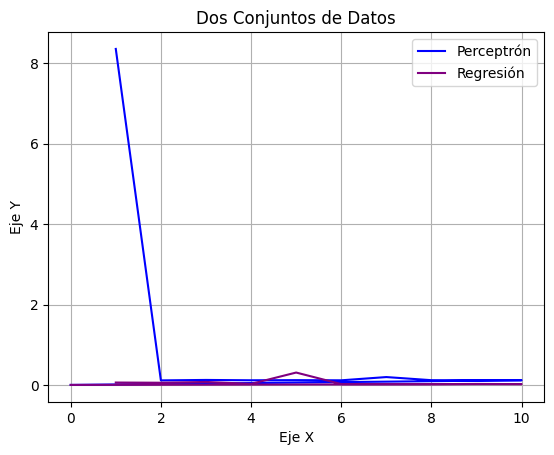

In [75]:

# Graficar los datos

plt.plot(array_n, tiempos_perceptron, label='Perceptrón', color='blue')
plt.plot(array_n, tiempos_regresion, label='Regresión', color='purple')

# Etiquetas de los ejes y título

plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.title('Dos Conjuntos de Datos')


plt.legend()

# Mostrar la gráfica

plt.grid(True)
plt.show()
